In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
sns.set()
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv("C:/Users/COMPUMARTS/Downloads/DiabetesPrediction/diabetes(females).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h3> Dataset comprises of 768 observations and 9 fields. </h3>

<h4> The following features have been provided to help us predict whether a person is diabetic or not: </h4>
<ul>
<li>Pregnancies: Number of times pregnant</li>
<li>Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test. Less than 140 mg/dL is considered normal level of glucose.</li>
<li>BloodPressure: Diastolic blood pressure (mm Hg). 120/80 is normal BP level for female above 18 yr old.</li>
<li>SkinThickness: Triceps skin fold thickness (mm)</li>
<li>Insulin: 2-Hour serum insulin (mu U/ml). 16-166 mIU/L is considered the normal level of insulin.</li>
<li>BMI: Body mass index (weight in kg/(height in m)2)</li>
<li>DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)</li>
<li>Age: Age (years)</li>
<li>Outcome: Class variable (0 if non-diabetic, 1 if diabetic)</li>
</ul>


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
print("Number of rows present in the dataset are: ", df.shape)


Number of rows present in the dataset are:  (768, 9)


In [8]:
df.duplicated().sum()


0

In [27]:
df = df.rename(columns = {'DiabetesPedigreeFunction':'DPF'})


In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

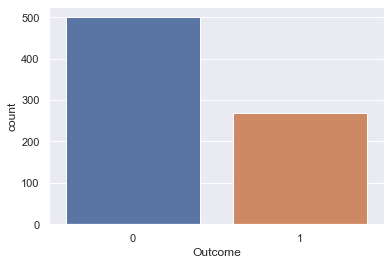

In [156]:
sns.countplot(df['Outcome'])
plt.show()

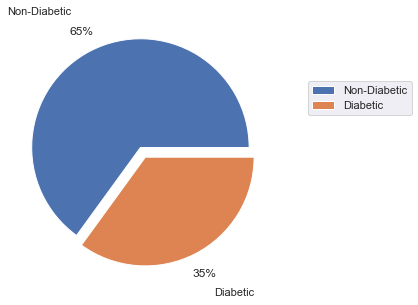

In [25]:
Non_Diabetic = round(500 / 768 * 100)
Diabetic = round(268 / 768 * 100)
fig, ax = plt.subplots(figsize=(10,5))

labels = ['Non-Diabetic', 
         'Diabetic']
percentages = [Non_Diabetic, Diabetic]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=True,bbox_to_anchor=(1.5,0.8))
plt.show()

In [97]:
# Replace zeros with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [98]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042
Pregnancies,0,0.000000
DPF,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

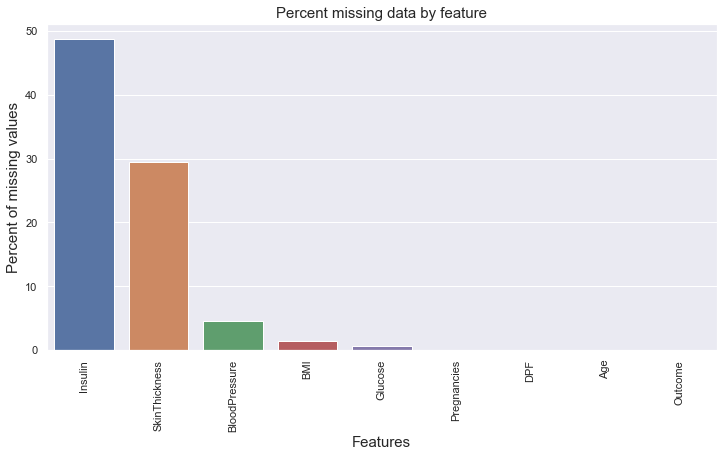

In [100]:
f, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### Highlights

<pre>Insulin has 374 missing values which is about 48.7% of total missing values.
SkinThickness has 227 missing values which is only 29.6% of total missing values.
BloodPressure has 35 missing values which is only 4.6% of total missing values.
BMI has only 11 missing values which is only 1.4% of total missing values. </pre>

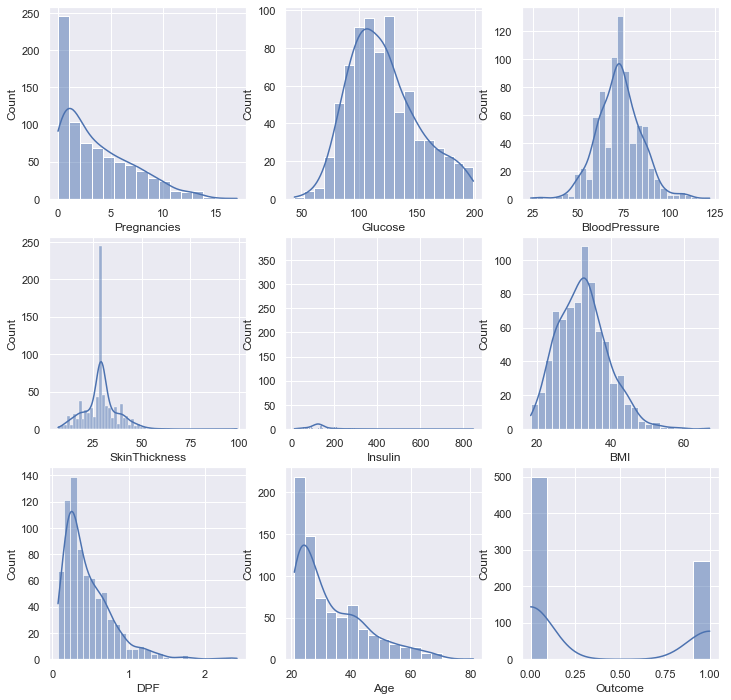

In [195]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF',
'Age', 'Outcome']):
    plt.subplot(3,3, i+1)
    sns.histplot(data = df , x = col,kde=True)
plt.show()    

In [196]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

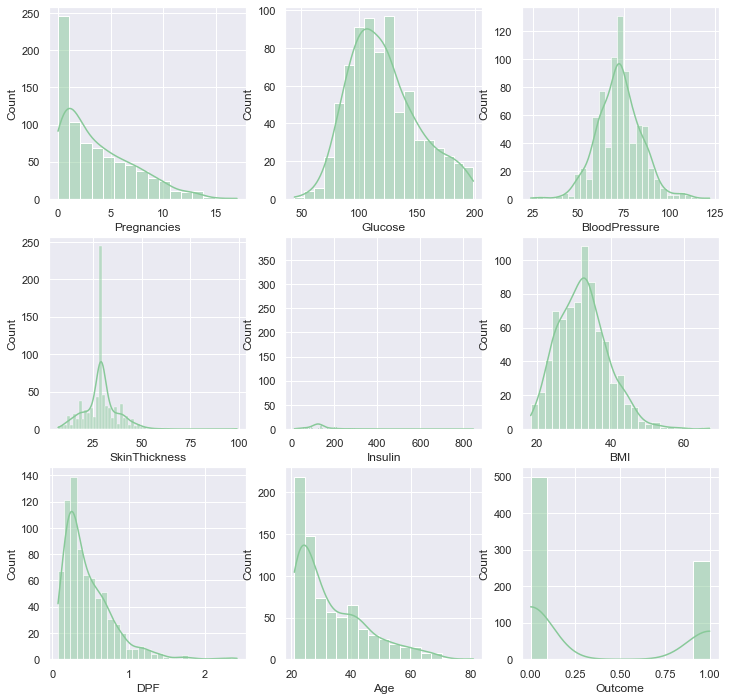

In [197]:
#Check the distribution of each column after NaN removal
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF',
'Age', 'Outcome']):
    plt.subplot(3,3, i+1)
    sns.histplot(data = df , x = col,kde=True,color = '#88c999')
plt.show()    

In [115]:
for col in df.columns:
    print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 44.0
The minimum value fore the columns BloodPressure is 24.0
The minimum value fore the columns SkinThickness is 7.0
The minimum value fore the columns Insulin is 14.0
The minimum value fore the columns BMI is 18.2
The minimum value fore the columns DPF is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


In [108]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,50
Insulin,185
BMI,247
DPF,517
Age,52
Outcome,2


In [155]:
df['Age'].value_counts().head()

22    72
21    63
25    48
24    46
23    38
Name: Age, dtype: int64

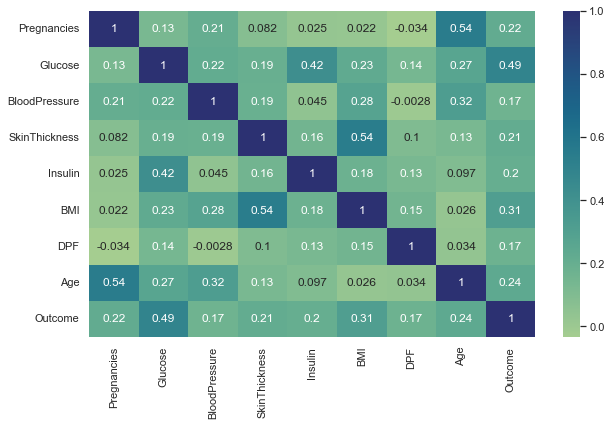

In [138]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap='crest')
plt.show()

<Figure size 720x432 with 0 Axes>

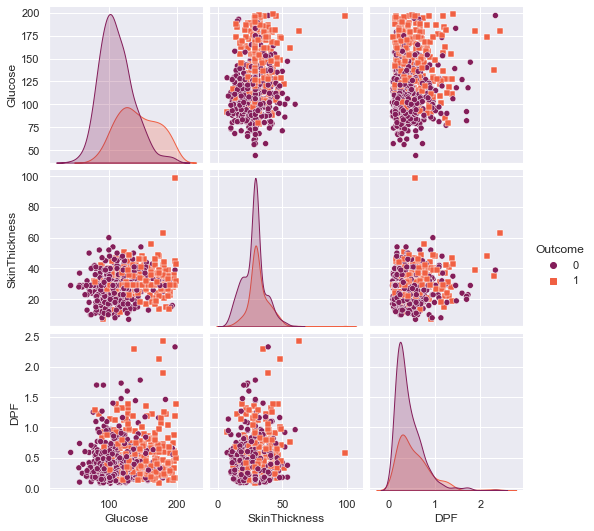

In [136]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df,vars=['Glucose', 'SkinThickness', 'DPF'], hue='Outcome',palette='rocket', markers=["o", "s"])
plt.show()

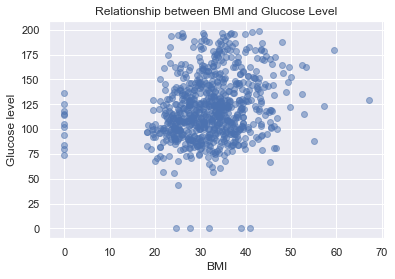

In [46]:
plt.scatter(df['BMI'], df['Glucose'], alpha=0.5,color=)
plt.title('Relationship between BMI and Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

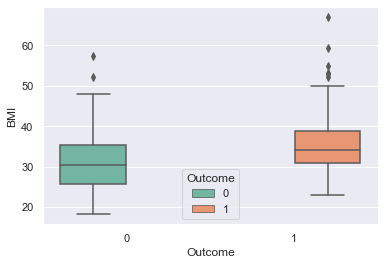

In [187]:

sns.boxplot(x='Outcome', y='BMI',data=df, hue='Outcome',palette='Set2')

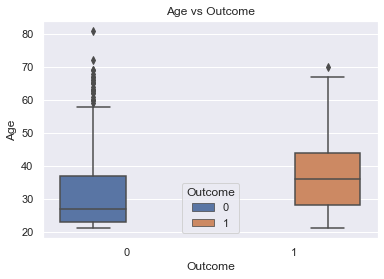

In [188]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df,hue='Outcome')
plt.title('Age vs Outcome')
plt.show()

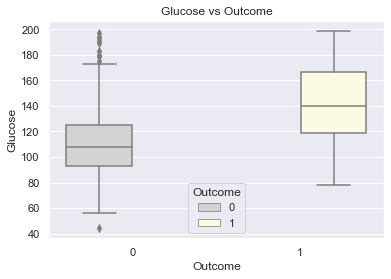

In [189]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = my_pal,hue='Outcome')
plt.title('Glucose vs Outcome')
plt.show()

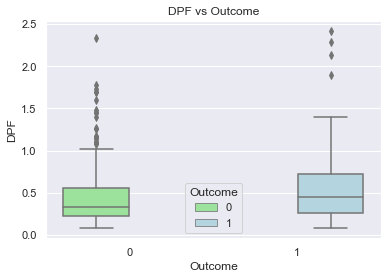

In [190]:
my_pal = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'DPF', data = df, palette = my_pal,hue='Outcome')
plt.title('DPF vs Outcome')
plt.show()

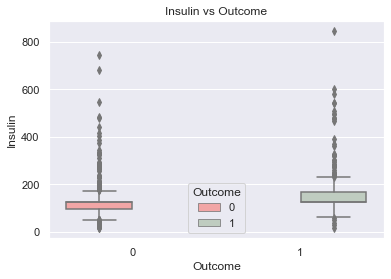

In [191]:
my_pal = {0: "#ff9999", 1: "#bdcebe"}
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df,palette = my_pal,hue='Outcome')
plt.title('Insulin vs Outcome')
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

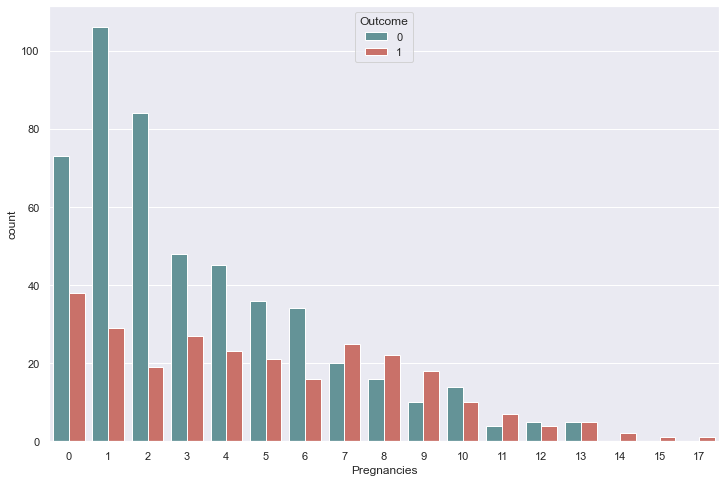

In [162]:
my_pal = {0: "#5b9aa0", 1: "#d96459"}
plt.figure(figsize=(12,8))
sns.countplot(x='Pregnancies',data=df,hue = 'Outcome',palette = my_pal)

In [163]:
# set inputs and outputs
X = df.drop('Outcome',axis = 1)
y =df['Outcome']

In [164]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [165]:
# checking the shape of the train and test datasets
print("The shape of x_train is: ",x_train.shape)
print("The shape of x_test is: ",x_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train is:  (614, 8)
The shape of x_test is:  (154, 8)
The shape of y_train is:  (614,)
The shape of y_test is:  (154,)


In [166]:
#standardize data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [167]:
#Finding K
test_scores = []
train_scores = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))


# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_index))))

Max test score 79.22077922077922 % and k = [12]


In [179]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


Text(0, 0.5, 'Accuracy')

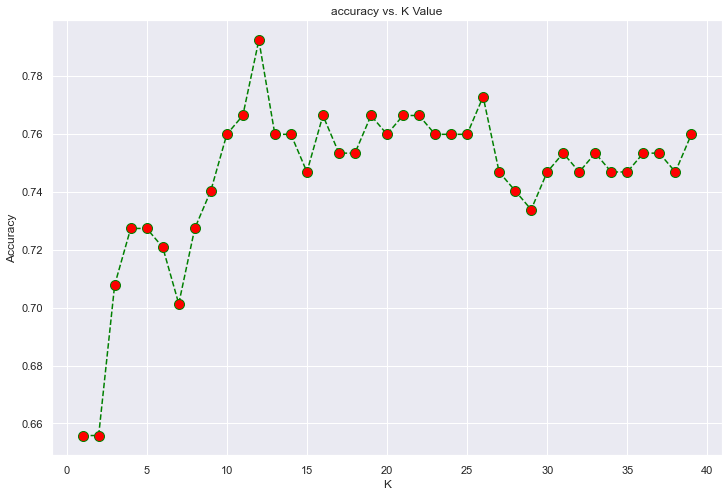

In [178]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),test_scores,color = 'green',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

<AxesSubplot:>

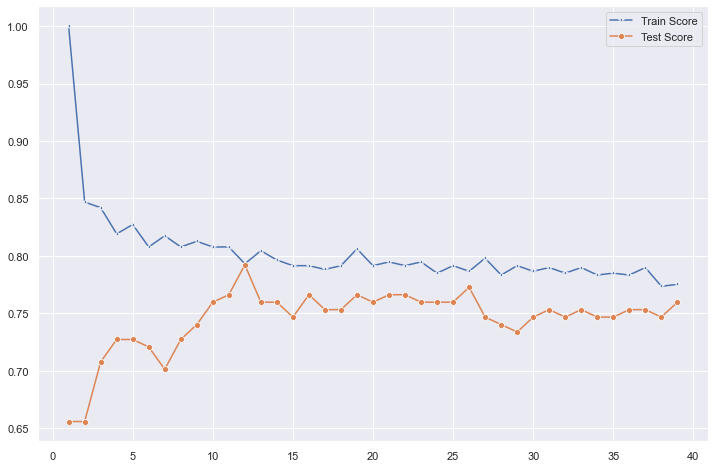

In [181]:
plt.figure(figsize=(12,8))
sns.lineplot(range(1,40),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')

In [168]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred = knn.predict(X_test_scaled)

### Model Performance Analysis


In [169]:
#Evaluate the model
print(f'Test accuracy: {knn.score(X_test_scaled,y_test)*100}')
print(f'Train accuracy: {knn.score(X_train_scaled,y_train)*100}')

Test accuracy: 79.22077922077922
Train accuracy: 79.31596091205212


In [183]:
knn_cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', knn_cm)

print('\nTrue Positives(TP) = ', knn_cm[0,0])

print('\nTrue Negatives(TN) = ', knn_cm[1,1])

print('\nFalse Positives(FP) = ', knn_cm[0,1])

print('\nFalse Negatives(FN) = ', knn_cm[1,0])

Confusion matrix

 [[87 12]
 [20 35]]

True Positives(TP) =  87

True Negatives(TN) =  35

False Positives(FP) =  12

False Negatives(FN) =  20


<AxesSubplot:>

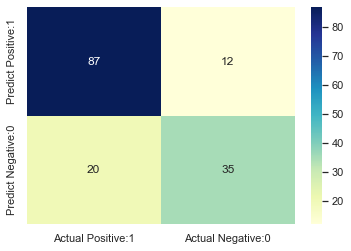

In [184]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=knn_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [185]:
#Create a classification report for the model.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [186]:
print("Accuracy:", str(accuracy_score(y_test,y_pred)*100)+' %')
print("Precision:", str(precision_score(y_test, y_pred)*100)+' %')
print("Recall:", str(recall_score(y_test,y_pred)*100)+' %')
print("F1 Score:", str(f1_score(y_test,y_pred)*100)+' %')


Accuracy: 79.22077922077922 %
Precision: 74.46808510638297 %
Recall: 63.63636363636363 %
F1 Score: 68.62745098039215 %
